## -Fraud Detection in Financial Transactions

### -Business Context: Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan

### -Tasks
#### -1. Data cleaning including missing values, outliers and multi-collinearity.
#### -2. Perform Detailed Data Analysis
#### -3. Perform EDA
#### -4. What are the key factors that predict fraudulent customer?

#### - importing important libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### -importing dataset into notebook

In [2]:
data=pd.read_csv(r"C:\Users\USER PC\anaconda_projects\DataScience\project2\Fraud.csv")

In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,6362610,6362611,6362612,6362613,6362614,6362615,6362616,6362617,6362618,6362619
step,1,1,1,1,1,1,1,1,1,1,...,742,742,743,743,743,743,743,743,743,743
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,DEBIT,...,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT
amount,9839.64,1864.28,181.0,181.0,11668.14,7817.71,7107.77,7861.64,4024.36,5337.77,...,63416.99,63416.99,1258818.82,1258818.82,339682.13,339682.13,6311409.28,6311409.28,850002.52,850002.52
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720,C90045638,C154988899,C1912850431,C1265012928,C712410124,...,C778071008,C994950684,C1531301470,C1436118706,C2013999242,C786484425,C1529008245,C1162922333,C1685995037,C1280323807
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0,53860.0,183195.0,176087.23,2671.0,41720.0,...,63416.99,63416.99,1258818.82,1258818.82,339682.13,339682.13,6311409.28,6311409.28,850002.52,850002.52
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86,46042.29,176087.23,168225.59,0.0,36382.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703,M573487274,M408069119,M633326333,M1176932104,C195600860,...,C1812552860,C1662241365,C1470998563,C1240760502,C1850423904,C776919290,C1881841831,C1365125890,C2080388513,C873221189
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0,0.0,0.0,0.0,0.0,41898.0,...,0.0,276433.18,0.0,503464.5,0.0,0.0,0.0,68488.84,0.0,6510099.11
newbalanceDest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40348.79,...,0.0,339850.17,0.0,1762283.33,0.0,339682.13,0.0,6379898.11,0.0,7360101.63
isFraud,0,0,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


#### -Basic checks

In [4]:
data.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
step,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,DEBIT,...,TRANSFER,TRANSFER,TRANSFER,TRANSFER,TRANSFER,TRANSFER,TRANSFER,TRANSFER,PAYMENT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14,7817.71,7107.77,7861.64,4024.36,5337.77,...,358831.92,367768.4,209711.11,583848.46,1724887.05,710544.77,581294.26,11996.58,2875.1,8586.98
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720,C90045638,C154988899,C1912850431,C1265012928,C712410124,...,C908084672,C288306765,C1556867940,C1839168128,C1495608502,C835773569,C843299092,C605982374,C1412322831,C1305004711
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0,53860.0,183195.0,176087.23,2671.0,41720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15443.0,3763.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86,46042.29,176087.23,168225.59,0.0,36382.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12567.9,0.0
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703,M573487274,M408069119,M633326333,M1176932104,C195600860,...,C392292416,C1359044626,C1509514333,C1286084959,C1590550415,C1359044626,C1590550415,C1225616405,M1651262695,M494077446
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0,0.0,0.0,0.0,0.0,41898.0,...,474384.53,370763.1,399214.71,667778.0,3470595.1,738531.5,5195482.15,40255.0,0.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40348.79,...,3420103.09,16518.36,2415.16,2107778.11,19169204.93,16518.36,19169204.93,0.0,0.0,0.0
isFraud,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [9]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### -inference from dataset
#### -Here out of 11 columns there is 8 number column and 3 categarical column with target varible here is isFraud
#### -Target variable isFraud have 6354407 as non_fraud and 8213 as fraud data from total of 6362620
#### -The mean transation amount is 1.798619 which is large transaction happen
#### -The type of transaction facility which is mostly used by CASH_OUT
#### -The maximum oldbalanceOrg(the intial balance before transaction) is 5.958504 and the newbalaceOrig(the new balance after transaction) is 4.958504
#### -There is average of 2.433972 step(unit of time in real world 1step = 1hour) happen in every hour
#### -There is mean of isFraud 1.290820

## -EDA (Exploratory Data analysis)


<Axes: xlabel='step', ylabel='Density'>

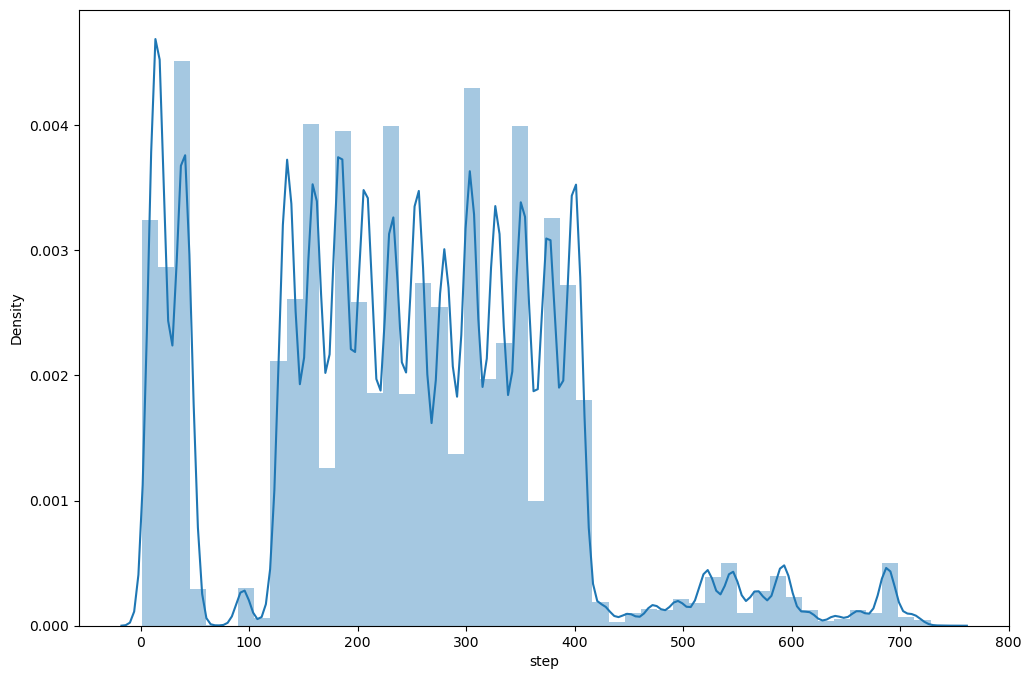

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(data['step'],kde='ecef')

### -This diagram step (1 step = 1 hour of time) show where in range of 120 to 430 where 0 to 400 which is about 17 days in 31 days where these hours have high density of transaction happen

<Axes: xlabel='count', ylabel='type'>

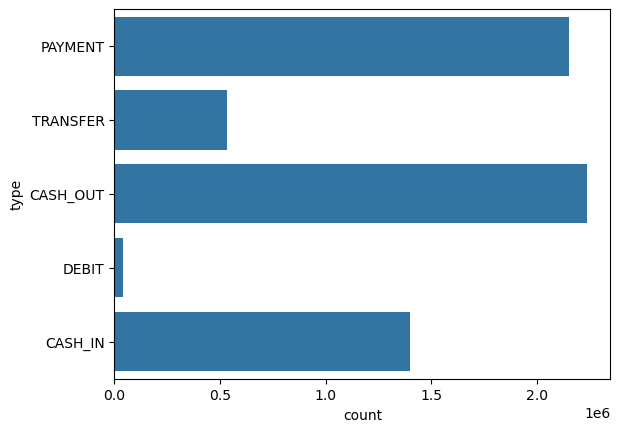

In [11]:
sns.countplot(data['type'])

In [12]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### -The type (mode of transaction) mostly happen in cash_out and secondly payment method

In [13]:
# Separating fraud and non-fraud for coloured visual
fraud=data[data['isFraud']==1]
non_fraud=data[data['isFraud']==0]

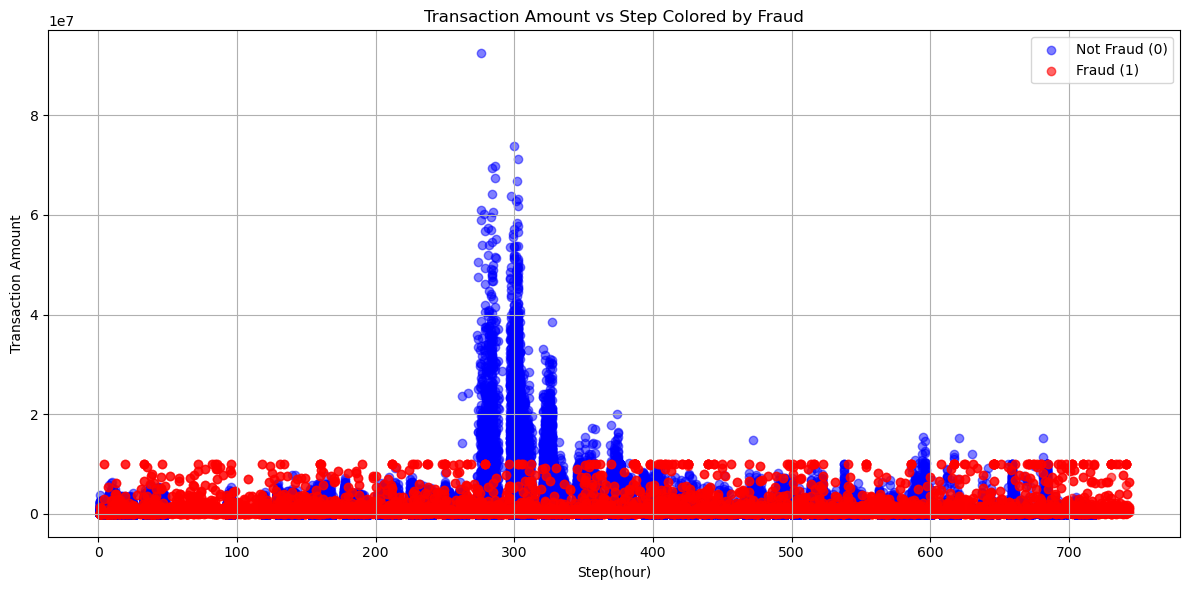

In [14]:
plt.figure(figsize=(12,6))
#non fraud with step and amount
plt.scatter(non_fraud['step'], non_fraud['amount'],color='blue',label='Not Fraud (0)',alpha=0.5)
#fraud with step and amout
plt.scatter(fraud['step'], fraud['amount'],color='red',label='Fraud (1)',alpha=0.6)
plt.xlabel("Step(hour)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount vs Step Colored by Fraud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### - like above step diagram show more amount transaction happen in range of 260 to 380 some amount is higher than 8 million

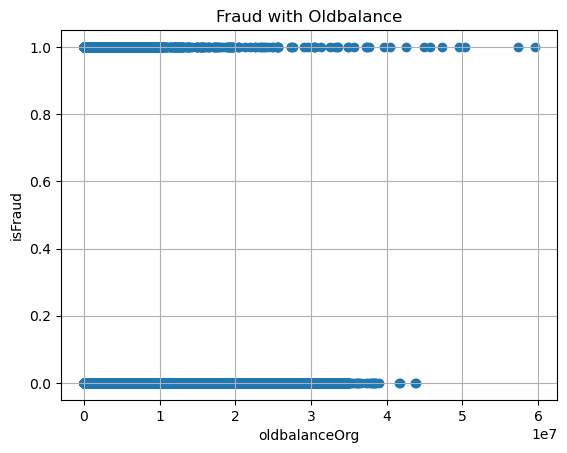

In [15]:
plt.scatter(x='oldbalanceOrg',y='isFraud',data=data)
plt.title('Fraud with Oldbalance')
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.grid()

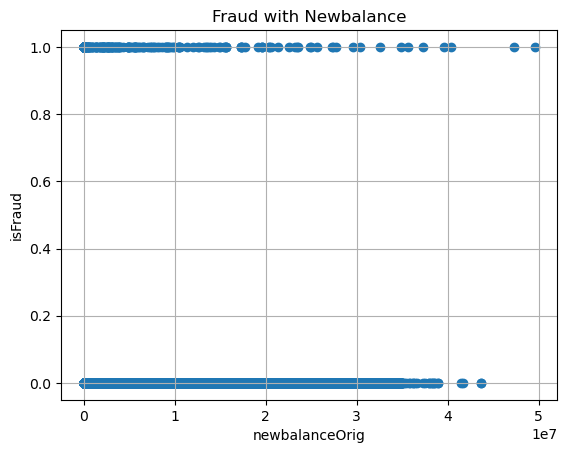

In [16]:
plt.scatter(x=data['newbalanceOrig'],y=data['isFraud'])
plt.title('Fraud with Newbalance')
plt.xlabel('newbalanceOrig')
plt.ylabel('isFraud')
plt.grid()

### - from the above both oldbalanceOrg(initial balance before transaction) and newbalanceOrg (new balance after transaction) lool like there is reduce in amount of after transaction (newbalanceOrg) 

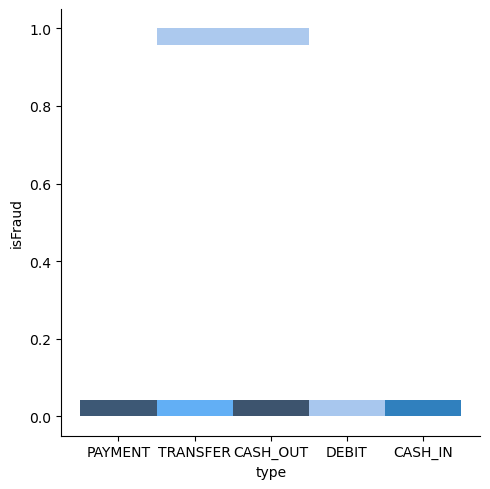

In [17]:
sns.displot(x='type',y='isFraud',data=data)

### -The most occuring mode Transaction prefered is both cash_outand transfer and these two mode have fraud taken place

In [18]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
#better visual diagram importing sweetviz library
import sweetviz as sv
report=sv.analyze(data)
report.show_html('visual report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report visual report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data preprocessing

In [20]:
#checking null value
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
#checking duplicates
data.duplicated().sum()

0

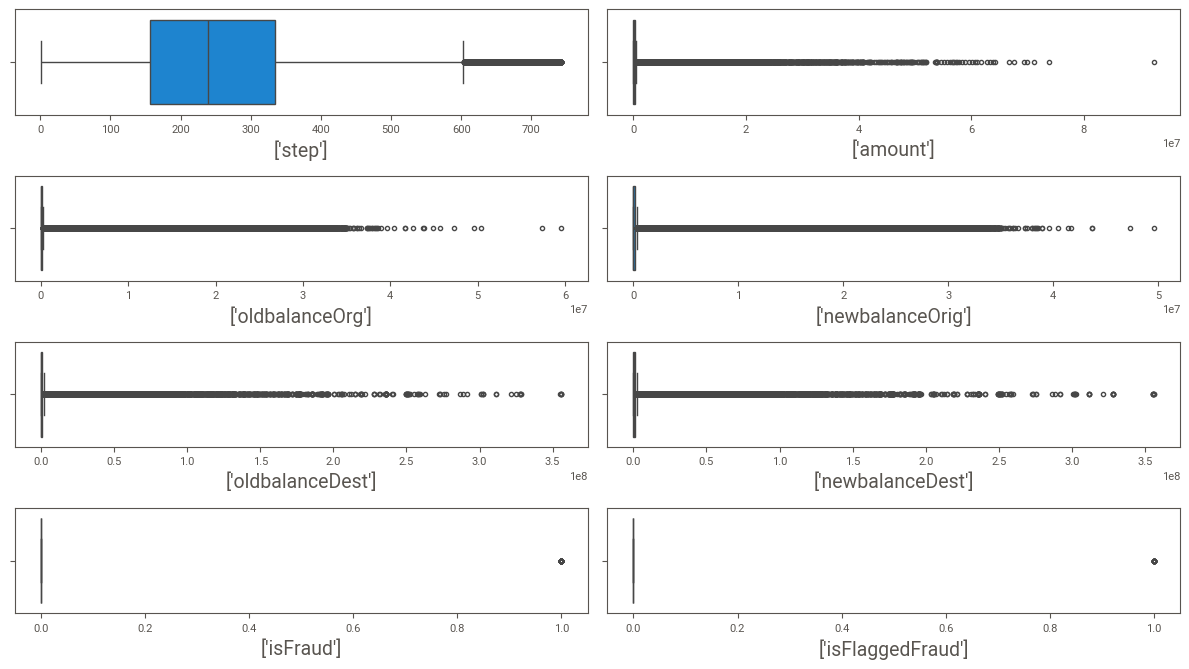

In [22]:
#Outlier checking
plt.figure(figsize=(12,8))
pltnum=1
for i in data.describe(include='number'):
    if pltnum<9:
        ax=plt.subplot(5,2,pltnum)
        sns.boxplot(x=data[i])
        plt.xlabel([i],fontsize=14)
    pltnum+=1
    plt.tight_layout()

In [23]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
#imputing with iqr method
outliers_data=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']
for i in outliers_data :
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    print(i)
    print(f'Q1:{q1},Q3:{q3}')
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    print(f'UpperLimit:{upper},LowerLimit:{lower}')
    data[i]=np.where(data[i]>=upper,upper,
                     np.where(data[i]<=lower,lower,
                          data[i]))

step
Q1:156.0,Q3:335.0
UpperLimit:603.5,LowerLimit:-112.5
amount
Q1:13389.57,Q3:208721.4775
UpperLimit:501719.33875,LowerLimit:-279608.29125
oldbalanceOrg
Q1:0.0,Q3:107315.175
UpperLimit:268287.9375,LowerLimit:-160972.7625
newbalanceOrig
Q1:0.0,Q3:144258.41
UpperLimit:360646.025,LowerLimit:-216387.615
oldbalanceDest
Q1:0.0,Q3:943036.7075
UpperLimit:2357591.76875,LowerLimit:-1414555.06125
newbalanceDest
Q1:0.0,Q3:1111909.25
UpperLimit:2779773.125,LowerLimit:-1667863.875
isFlaggedFraud
Q1:0.0,Q3:0.0
UpperLimit:0.0,LowerLimit:0.0


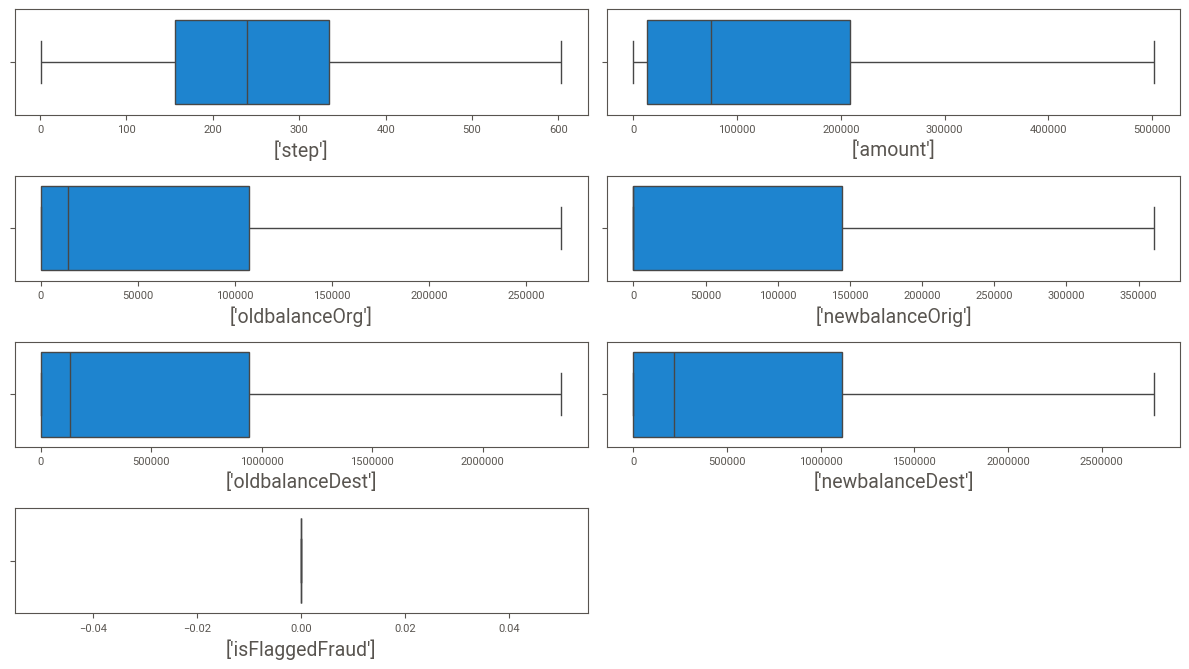

In [25]:
#recheking outlier in numerical columns
plt.figure(figsize=(12,8))
pltnum=1
for i in outliers_data:
    if pltnum<9:
        ax=plt.subplot(5,2,pltnum)
        sns.boxplot(x=data[i])
        plt.xlabel([i],fontsize=14)
    pltnum+=1
    plt.tight_layout()

In [26]:
#encoding the categorical data
for i in data.describe(include='object'):
    print(data[i].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64


In [27]:
#one hot encoding the 'type' feature
data=pd.get_dummies(data,columns=['type'])

In [28]:
#frequency encoding using loop both nameorig and namedest
freq_data=['nameOrig','nameDest']
for i in freq_data:
    freq_map=data[i].value_counts().to_dict()
    data[i]=data[i].map(freq_map)                         

In [29]:
#droping unwanted columns
data.drop('isFlaggedFraud',axis=1,inplace=True)

<Axes: >

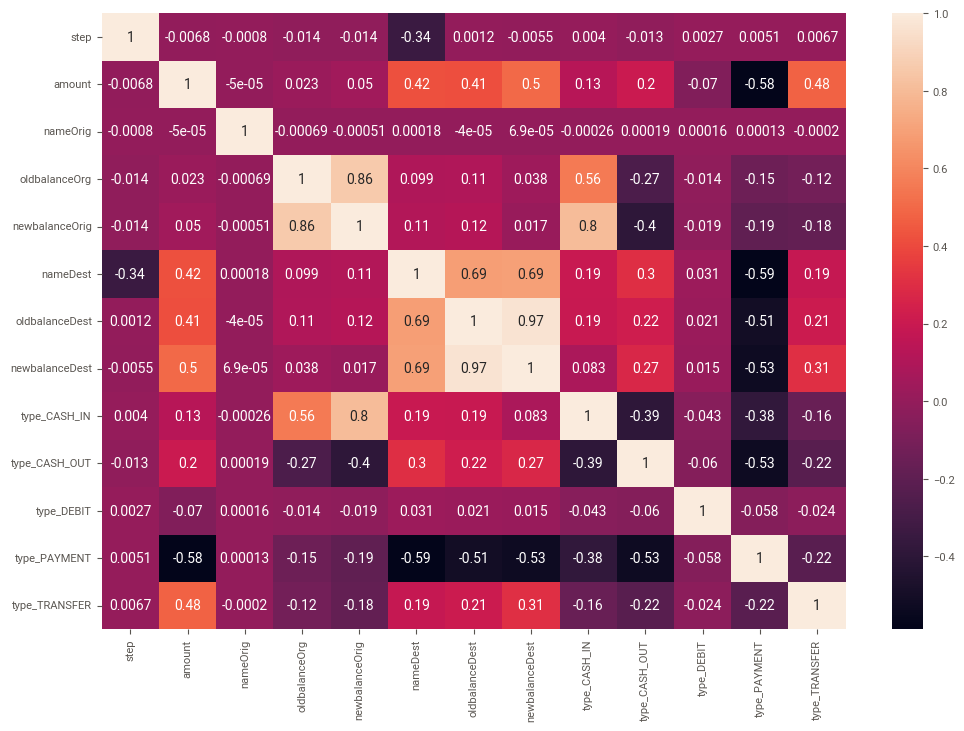

In [30]:
#feature enginerring
#checking multicollinearity between independent variable
plt.figure(figsize=(12,8))
sns.heatmap(data.drop('isFraud',axis=1).corr(),annot=True)

In [31]:
#spliting data for training and testing 
x=data.drop('isFraud',axis=1)
y=data['isFraud']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
x_train.shape

(4771965, 13)

In [33]:
y_test.shape

(1590655,)

In [34]:
#smoting the target varible isFraud
from imblearn.over_sampling import SMOTE
#intilaizing smote
smote=SMOTE()

In [35]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [36]:
#to make count of smote before and after
from collections import Counter
print('before smote: ',Counter(y_train))
print('after smote: ',Counter(y_smote))

before smote:  Counter({0: 4765797, 1: 6168})
after smote:  Counter({0: 4765797, 1: 4765797})


In [37]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_smote_scaled=scale.fit_transform(x_smote)
x_test_scaled=scale.transform(x_test)

### -Logistic Regression

In [38]:
#model building using regularization 
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()

In [39]:
model_log.fit(x_smote_scaled,y_smote)

LogisticRegression()

In [40]:
#predicting the test data
y_pred_log=model_log.predict(x_test_scaled)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
#model evalution
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report
print(classification_report(y_test,y_pred_log))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1588610
           1       0.02      0.94      0.04      2045

    accuracy                           0.94   1590655
   macro avg       0.51      0.94      0.50   1590655
weighted avg       1.00      0.94      0.97   1590655



In [42]:
print(f1_score(y_test,y_pred_log))

0.037096165568488576


In [43]:
from sklearn.metrics import auc,roc_curve

In [44]:
fp,tp,threshold=roc_curve(y_test,y_pred_log)
roc_score=auc(fp,tp)
print('roc_score:',roc_score)

roc_score: 0.9374217775441738


### Decision Tree Classifier

In [45]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier

In [46]:
#intialising the model
model_dec=DecisionTreeClassifier(random_state=40)

In [47]:
##training the x and y smote
model_dec.fit(x_smote,y_smote)

DecisionTreeClassifier(random_state=40)

In [48]:
#predicting the test data
y_pred_dec=model_dec.predict(x_test)

In [49]:
#model evaluation
print(classification_report(y_test,y_pred_dec))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.58      0.92      0.71      2045

    accuracy                           1.00   1590655
   macro avg       0.79      0.96      0.86   1590655
weighted avg       1.00      1.00      1.00   1590655



In [50]:
print(f1_score(y_test,y_pred_dec))

0.7143942271173567


In [51]:
fp,tp,threshold=roc_curve(y_test,y_pred_dec)
roc_score=auc(fp,tp)
print('roc_score:',roc_score)

roc_score: 0.9594804481394592


### Random Forest CLassifier

In [52]:
#importing random forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
#model intializing
model_ran=RandomForestClassifier()

In [54]:
#training 
model_ran.fit(x_smote,y_smote)

RandomForestClassifier()

In [55]:
#predicting
y_pred_ran=model_ran.predict(x_test)

In [56]:
#model evalution
print(classification_report(y_test,y_pred_ran))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.56      0.91      0.69      2045

    accuracy                           1.00   1590655
   macro avg       0.78      0.95      0.85   1590655
weighted avg       1.00      1.00      1.00   1590655



In [57]:
print(f1_score(y_test,y_pred_ran))

0.6911189722584249


In [58]:
fp,tp,threshold=roc_curve(y_test,y_pred_ran)
roc_score=auc(fp,tp)
print('roc_score:',roc_score)

roc_score: 0.9533270624290902


### Gradient Desent Classifier

In [59]:
# importing gradient desent classifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
#initialising the model
model_grd=GradientBoostingClassifier()

In [61]:
#training
model_grd.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [62]:
#predicting
y_pred_grd=model_grd.predict(x_test)

In [63]:
#model evalution
print(classification_report(y_test,y_pred_grd))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588610
           1       0.06      1.00      0.12      2045

    accuracy                           0.98   1590655
   macro avg       0.53      0.99      0.56   1590655
weighted avg       1.00      0.98      0.99   1590655



In [64]:
print(f1_score(y_test,y_pred_grd))

0.12032962164397318


In [65]:
fp,tp,threshold=roc_curve(y_test,y_pred_grd)
roc_score=auc(fp,tp)
print('roc_score:',roc_score)

roc_score: 0.9886726096250987


### Xgboost Classifier

In [66]:
#importing xgboost classifier
from xgboost import XGBClassifier

In [67]:
#intializing the model
model_xgb=XGBClassifier(random_state=42)

In [68]:
# training the model with x and y smote data
model_xgb.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
#predicting the test data
y_pred_xgb=model_xgb.predict(x_test_scaled)

In [70]:
#model evaluation
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93   1588610
           1       0.01      0.53      0.01      2045

    accuracy                           0.87   1590655
   macro avg       0.50      0.70      0.47   1590655
weighted avg       1.00      0.87      0.93   1590655



In [71]:
print(f1_score(y_test,y_pred_xgb))

0.010760398174292736


In [72]:
fp,tp,threshold=roc_curve(y_test,y_pred_xgb)
roc_score=auc(fp,tp)
print('roc_score:',roc_score)

roc_score: 0.7033529719642807


### -Here the best model is Decision Tree classifier because balanced recall and precision and f1 score is 0.71 which is good manner and roc_auc score is 95% too

In [103]:
data.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [121]:
#predicting with new data
new_data = pd.DataFrame([{'step':100,'amount':181,'nameOrig':1,'oldbalanceOrg':181,'newbalanceOrig':0,'nameDest':44,
                          'oldbalanceDest':0,'newbalanceDest':0,'type_CASH_IN':0,'type_CASH_OUT':0,'type_DEBIT':0,'type_PAYMENT':0,
                          'type_TRANSFER':1}])

In [122]:
#predicting with best model (decision Tree Classifier)
prediction = model_dec.predict(new_data)
if prediction[0]==1:
    print('Fraud')
else:
    print('Not Fraud')

Fraud


## conclussion
### -1. Imported the dataset and did basic checks (head,info,describe).
### -2. The target variable is isFraud which contain about 6.36 million data,the value is 0 (non-fraud) and 1 (fraud) which is classification nature. 
### -3. Perform EDA (Exploratory Data Analysis) with univarite and bivariate which is compared with target variable and used sweetviz library to             visulaize the diagram even more informative.
### -4. Then after did Data preprocessing steps (missing value, duplicated value, finding outlier) some data have outliers which is imputed by median.
### -5. There is 3 feature which is categarical and 9 are numerical out of 11, so the catogorical feature are encoded with appropricate encoders.
### -6. In heatmap correlation appropriate feature are removed but almost every features is important with target variable
### -7. There is imbalance data nature in target variable so smote is used for resampling the data for training and split after done scaling and model building
### -8.imported important machine learning models like (logistic Regression ,decision tree, Random forest, Gradient decent, xg boost) all are classifier because of nature of target varible isFraud and choose Decision Tree Classifier which give best model evalution.